## Modelling

#### Split data into train and validation set

In [27]:
%%time
from sklearn.model_selection import train_test_split

X = train_df.drop('SalePrice', axis=1)
y = train_df.SalePrice

X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  random_state=42,
                                                  test_size=0.2)

X_train.shape, y_train.shape, X_val.shape, y_val.shape

Wall time: 312 ms


((1168, 126), (1168,), (292, 126), (292,))

 ### Create a metrics evaluation function

First create a function to calculate the RMSLE, which is used as evaluation metric for the competition. Then `show_scores` function that compares performances of a single estimator, using MAE, RMLSE and R2 scores.

In [34]:
# Import evaluation metrics
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

# Create a function to calculate the RMSLE
def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create overall evaluation function
def show_scores(model):
    train_preds = model.predict((X_train))
    val_preds = model.predict(X_val)
    scores = {'Training MAE': round(mean_absolute_error(y_train, train_preds),3),
             'Validation MAE': round(mean_absolute_error(y_val, val_preds),3),
             'Training RMSLE': round(rmsle(y_train, train_preds),3),
             'Validation RMSLE': round(rmsle(y_val, val_preds),3),
             'Training R2': round(r2_score(y_train, train_preds),3),
             'Validation R2': round(r2_score(y_val, val_preds),3)}
    return scores

### Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor
# Changen max_samples value in the RandomForestRegressor
rf_model = RandomForestRegressor(n_jobs=-1, 
                             random_state=42,
                             max_samples=1168)

In [41]:
# Fit the RandomForestRegressor model
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=1168, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [43]:
# Show rf_model scores
show_scores(rf_model)

{'Training MAE': 6572.157,
 'Validation MAE': 17642.673,
 'Training RMSLE': 0.059,
 'Validation RMSLE': 0.154,
 'Training R2': 0.98,
 'Validation R2': 0.893}

#### Hyperparameter tuning using RandomizedSearchCV

In [44]:
%%time

from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters grid for the estimator
rf_rs_grid = {'n_estimators': np.arange(10,100,1000),
           'max_depth': [None,3,5,10],
          'min_samples_split': np.arange(2,20,2),
          'min_samples_leaf': np.arange(1,20,2),
          'max_features': [0.5, 1, 'sqrt', 'auto'],
          'max_samples': [1168]}

# Instantiate the RandomizedSearchCV
rf_rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42),
                              param_distributions=rf_rs_grid,
                              n_iter=10,
                              cv=5,
                              verbose=True)
# Fit the RandomizedSearchCV model
rf_rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\david\OneDrive\Desktop\Python\Machine_learning_and_Data_Science\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range 1 to 934 but got value 1168

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\david\OneDrive\Desktop\Python\Machine_learning_and_Data_Science\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range 1 to 934 but got value 1168

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\david\OneDrive\Desktop\Python\Machine_learning_and_Data_Science\env\lib\site-packages\skle

C:\Users\david\OneDrive\Desktop\Python\Machine_learning_and_Data_Science\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range 1 to 934 but got value 1168

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\david\OneDrive\Desktop\Python\Machine_learning_and_Data_Science\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range 1 to 934 but got value 1168

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\david\OneDrive\Desktop\Python\Machine_learning_and_Data_Science\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. T

C:\Users\david\OneDrive\Desktop\Python\Machine_learning_and_Data_Science\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range 1 to 934 but got value 1168

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\david\OneDrive\Desktop\Python\Machine_learning_and_Data_Science\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range 1 to 934 but got value 1168

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\david\OneDrive\Desktop\Python\Machine_learning_and_Data_Science\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. T

Wall time: 1.51 s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [45]:
# Find best parameters within the grid provided to the model
rf_rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 10,
 'min_samples_leaf': 9,
 'max_samples': 1168,
 'max_features': 0.5,
 'max_depth': 3}

In [46]:
show_scores(rf_rs_model)

{'Training MAE': 24361.868,
 'Validation MAE': 26357.158,
 'Training RMSLE': 0.198,
 'Validation RMSLE': 0.228,
 'Training R2': 0.784,
 'Validation R2': 0.784}

In [47]:
show_scores(rf_model)

{'Training MAE': 6572.157,
 'Validation MAE': 17642.673,
 'Training RMSLE': 0.059,
 'Validation RMSLE': 0.154,
 'Training R2': 0.98,
 'Validation R2': 0.893}

With RandomizedSearchCV tuning we actually worsened the result previosly obtained with the rf_model. Therefore a further search with the GridSearchCV, will be done on the dataset.

### Hyperparameters tuning using GridSearchCV


In [28]:
# Importing GridsSearchCV
from sklearn.model_selection import GridSearchCV

In [49]:
%%time 
from sklearn.model_selection import GridSearchCV

rf_gs_grid = {'n_estimators': [10,20,30],
 'min_samples_split': [6,8,10,12],
 'min_samples_leaf': [1,3,5,7],
 'max_samples': [1168],
 'max_features': [0.5, 2, 3],
 'max_depth': [20, 30, 40, 50]}

rf_gs_model = GridSearchCV(RandomForestRegressor(n_jobs=-1,
                                              random_state=42),
                       param_grid=rf_gs_grid,
                       cv=5,
                       verbose=True,
                       n_jobs=5)

rf_gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   17.8s
[Parallel(n_jobs=5)]: Done 530 tasks      | elapsed:   28.2s
[Parallel(n_jobs=5)]: Done 1530 tasks      | elapsed:   45.8s
[Parallel(n_jobs=5)]: Done 2871 out of 2880 | elapsed:  1.2min remaining:    0.1s
[Parallel(n_jobs=5)]: Done 2880 out of 2880 | elapsed:  1.2min finished


Wall time: 1min 10s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=5

In [50]:
rf_gs_model.best_params_

{'max_depth': 20,
 'max_features': 0.5,
 'max_samples': 1168,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 10}

In [53]:
rf_gs_model.best_params_

{'max_depth': 20,
 'max_features': 0.5,
 'max_samples': 1168,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 10}

In [58]:
# Let's compare results between GridSearchCV tuned model and model without tuning
rf_df_scores = pd.DataFrame(data=[show_scores(rf_gs_model),show_scores(rf_model)], index=['GridSearchCV', 'RFRegressor'])
rf_df_scores

,Training MAE,Validation MAE,Training RMSLE,Validation RMSLE,Training R2,Validation R2
GridSearchCV,8920.159,18224.508,0.080,0.157,0.956,0.879
RFRegressor,6572.157,17642.673,0.059,0.154,0.980,0.893


Slighly better performed the basic RandomForestRegressor under the RMLSE point of view.

## Modelling with XGBoost

In [59]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=1000, random_state=42)

In [60]:
%%time
# Fit  teh XGBoost regressor
xgb_model.fit(X_train,
              y_train,
              early_stopping_rounds=5, 
             eval_set=[(X_val, y_val)],
             verbose=True)

[0]	validation_0-rmse:144361.39062
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:106002.58594
[2]	validation_0-rmse:79349.46094
[3]	validation_0-rmse:61037.39844
[4]	validation_0-rmse:48857.69141
[5]	validation_0-rmse:40664.58203
[6]	validation_0-rmse:35761.02734
[7]	validation_0-rmse:32243.28711
[8]	validation_0-rmse:30659.27734
[9]	validation_0-rmse:29488.87305
[10]	validation_0-rmse:28614.37109
[11]	validation_0-rmse:28104.36328
[12]	validation_0-rmse:27872.06641
[13]	validation_0-rmse:27646.63477
[14]	validation_0-rmse:27563.17383
[15]	validation_0-rmse:27384.74414
[16]	validation_0-rmse:27413.55078
[17]	validation_0-rmse:27318.71680
[18]	validation_0-rmse:27361.47852
[19]	validation_0-rmse:27429.91797
[20]	validation_0-rmse:27370.85938
[21]	validation_0-rmse:27263.21094
[22]	validation_0-rmse:27273.05664
[23]	validation_0-rmse:27226.96289
[24]	validation_0-rmse:27242.91992
[25]	validation_0-rmse:27192.53711
[26]	validation_0-rmse:27166.14453

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [61]:
show_scores(xgb_model)

{'Training MAE': 3925.298,
 'Validation MAE': 17086.343,
 'Training RMSLE': 0.037,
 'Validation RMSLE': 0.151,
 'Training R2': 0.995,
 'Validation R2': 0.904}

In [63]:
show_scores(xgb_model)

{'Training MAE': 3925.298,
 'Validation MAE': 17086.343,
 'Training RMSLE': 0.037,
 'Validation RMSLE': 0.151,
 'Training R2': 0.995,
 'Validation R2': 0.904}

**Consideration:** 

The XGBRegressor without any hyperparameters tuning, aready performed better than the RandomForestRegressor. Therefore now we will proceed with its tuning.

#### XGBoost RandomizedSearch CV 


In [64]:
%%time
rs_xgb_grid = {'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'max_depth': [3, 4, 5],
            'n_estimators': np.arange(10,100,10),
            'min_samples_split': np.arange(6,16,2),
            'min_samples_leaf': np.arange(1,15,2)}

xgb_rs_model = RandomizedSearchCV(XGBRegressor(n_estimators=1000, random_state=42),
                                 param_distributions=rs_xgb_grid,
                                 cv=5,
                                 verbose=True,
                                 n_iter=10)
xgb_rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[16:13:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[16:13:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:13:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:13:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.



[16:13:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:13:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:13:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.



[16:13:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:13:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:13:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.



[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   27.7s finished


[16:13:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Wall time: 28.7 s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'ma

In [65]:
xgb_rs_model.best_params_

{'subsample': 0.8,
 'n_estimators': 80,
 'min_samples_split': 6,
 'min_samples_leaf': 7,
 'min_child_weight': 10,
 'max_depth': 4,
 'gamma': 1,
 'colsample_bytree': 0.6}

In [66]:
show_scores(xgb_rs_model)

{'Training MAE': 7768.706,
 'Validation MAE': 18647.985,
 'Training RMSLE': 0.069,
 'Validation RMSLE': 0.148,
 'Training R2': 0.981,
 'Validation R2': 0.88}

#### XGBoost GridSearch CV

In [67]:
%%time
xgb_gs_grid = {'subsample': [1.0,1.4],
               'n_estimators': [70, 90],
               'min_samples_split': [6, 8],
               'min_samples_leaf': [3,6,9],
               'min_child_weight': [1],
               'max_depth': [3],
               'gamma': [0.5],
               'colsample_bytree': [1.0]}

xgb_gs_model = GridSearchCV(XGBRegressor(n_estimators=1000, random_state=42),
                           param_grid=xgb_gs_grid,
                            n_jobs=5,
                            cv=5,
                            verbose=True)
xgb_gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   21.9s
[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed:   39.0s finished


[16:14:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Wall time: 39.9 s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=5,
             param_grid={'colsample_bytree': [1.0], 'gamma': [0.5],
                         'max_dept

In [68]:
xgb_gs_model.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0.5,
 'max_depth': 3,
 'min_child_weight': 1,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 70,
 'subsample': 1.0}

In [70]:
show_scores(xgb_gs_model)

{'Training MAE': 8082.032,
 'Validation MAE': 17279.008,
 'Training RMSLE': 0.069,
 'Validation RMSLE': 0.145,
 'Training R2': 0.98,
 'Validation R2': 0.903}

In [71]:
# Let's compare results between GridSearchCV tuned model and model without tuning
xgb_df_scores = pd.DataFrame(data=[show_scores(xgb_model),show_scores(xgb_rs_model),show_scores(xgb_gs_model)], index=['XGBoost', 'RandomizedSearchCV', 'GridSearchCV'])
xgb_df_scores

,Training MAE,Validation MAE,Training RMSLE,Validation RMSLE,Training R2,Validation R2
XGBoost,3925.298,17086.343,0.037,0.151,0.995,0.904
RandomizedSearchCV,7768.706,18647.985,0.069,0.148,0.981,0.880
GridSearchCV,8082.032,17279.008,0.069,0.145,0.980,0.903


Doing a deeper GridSearchCV tuning we got eventually a better result in terms of RMLSE.

### Modelling with CatBoost

In [72]:
%%time
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor(n_estimators=1000, random_state=42)

cat_model.fit(X_train,
              y_train,
              early_stopping_rounds=5,
              eval_set=[(X_val, y_val)],
             verbose=True)

Learning rate set to 0.04745
0:	learn: 74810.1731801	test: 85072.3316169	best: 85072.3316169 (0)	total: 101ms	remaining: 1m 41s
1:	learn: 72793.9102696	test: 82896.4902906	best: 82896.4902906 (1)	total: 123ms	remaining: 1m 1s
2:	learn: 70685.1932062	test: 80737.4084745	best: 80737.4084745 (2)	total: 144ms	remaining: 47.8s
3:	learn: 68886.9335213	test: 78843.4340163	best: 78843.4340163 (3)	total: 164ms	remaining: 40.8s
4:	learn: 66784.8653020	test: 76615.7765738	best: 76615.7765738 (4)	total: 213ms	remaining: 42.4s
5:	learn: 65065.2157190	test: 74885.1290065	best: 74885.1290065 (5)	total: 264ms	remaining: 43.7s
6:	learn: 63397.1612040	test: 73077.2251797	best: 73077.2251797 (6)	total: 284ms	remaining: 40.3s
7:	learn: 61620.7403062	test: 71159.4541249	best: 71159.4541249 (7)	total: 304ms	remaining: 37.7s
8:	learn: 60186.9604526	test: 69741.4156433	best: 69741.4156433 (8)	total: 328ms	remaining: 36.1s
9:	learn: 58573.8895824	test: 68242.0005670	best: 68242.0005670 (9)	total: 349ms	remaini

82:	learn: 22900.5198323	test: 32746.7987738	best: 32746.7987738 (82)	total: 2.9s	remaining: 32s
83:	learn: 22813.6720998	test: 32670.9011471	best: 32670.9011471 (83)	total: 2.96s	remaining: 32.3s
84:	learn: 22657.0186404	test: 32578.1961327	best: 32578.1961327 (84)	total: 2.99s	remaining: 32.2s
85:	learn: 22552.0749814	test: 32453.1791723	best: 32453.1791723 (85)	total: 3.01s	remaining: 32s
86:	learn: 22416.0957710	test: 32384.6030528	best: 32384.6030528 (86)	total: 3.03s	remaining: 31.8s
87:	learn: 22326.7474946	test: 32313.5425281	best: 32313.5425281 (87)	total: 3.07s	remaining: 31.8s
88:	learn: 22229.3651093	test: 32217.3103563	best: 32217.3103563 (88)	total: 3.09s	remaining: 31.7s
89:	learn: 22144.1478920	test: 32124.4942479	best: 32124.4942479 (89)	total: 3.13s	remaining: 31.6s
90:	learn: 22045.1585335	test: 32083.2048634	best: 32083.2048634 (90)	total: 3.16s	remaining: 31.6s
91:	learn: 21952.4163635	test: 31992.8121191	best: 31992.8121191 (91)	total: 3.18s	remaining: 31.4s
92:	l

169:	learn: 17090.6820783	test: 28974.3646736	best: 28974.3646736 (169)	total: 5.38s	remaining: 26.3s
170:	learn: 17026.3789627	test: 28926.1931819	best: 28926.1931819 (170)	total: 5.41s	remaining: 26.2s
171:	learn: 17011.6732750	test: 28927.2213799	best: 28926.1931819 (170)	total: 5.45s	remaining: 26.3s
172:	learn: 16993.0870654	test: 28906.4526458	best: 28906.4526458 (172)	total: 5.46s	remaining: 26.1s
173:	learn: 16976.1419481	test: 28923.5865265	best: 28906.4526458 (172)	total: 5.5s	remaining: 26.1s
174:	learn: 16940.3607455	test: 28896.0425089	best: 28896.0425089 (174)	total: 5.53s	remaining: 26.1s
175:	learn: 16925.6977996	test: 28875.8734334	best: 28875.8734334 (175)	total: 5.56s	remaining: 26s
176:	learn: 16881.1354925	test: 28885.6430799	best: 28875.8734334 (175)	total: 5.61s	remaining: 26.1s
177:	learn: 16818.1710870	test: 28873.9836831	best: 28873.9836831 (177)	total: 5.64s	remaining: 26s
178:	learn: 16804.9472532	test: 28863.3415865	best: 28863.3415865 (178)	total: 5.65s	re

255:	learn: 14188.1530341	test: 28107.4007211	best: 28087.8650052 (254)	total: 7.88s	remaining: 22.9s
256:	learn: 14153.0278465	test: 28102.9429724	best: 28087.8650052 (254)	total: 7.9s	remaining: 22.8s
257:	learn: 14113.5889976	test: 28106.8996441	best: 28087.8650052 (254)	total: 7.97s	remaining: 22.9s
258:	learn: 14093.2249020	test: 28111.1425756	best: 28087.8650052 (254)	total: 8.03s	remaining: 23s
259:	learn: 14072.8412419	test: 28125.1553484	best: 28087.8650052 (254)	total: 8.11s	remaining: 23.1s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 28087.86501
bestIteration = 254

Shrink model to first 255 iterations.
Wall time: 9.13 s


In [73]:
show_scores(cat_model)

{'Training MAE': 10275.924,
 'Validation MAE': 16966.913,
 'Training RMSLE': 0.088,
 'Validation RMSLE': 0.143,
 'Training R2': 0.966,
 'Validation R2': 0.897}

#### CatBoost RandomizedSearchCV

In [76]:
%%time
# Create Catboost grid
cat_rs_grid = {'depth'         : [6,8,10],
               'learning_rate' : [0.01, 0.05, 0.1],
               'iterations'    : [30, 50, 100],
              'depth': np.arange(0,16,2),
               'l2_leaf_reg': np.arange(100,1000,100),
               'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide']}
# Instantiate the RandomizedSearchCV model
cat_rs_model = RandomizedSearchCV(CatBoostRegressor( random_state=42, early_stopping_rounds=3),
                                 param_distributions=cat_rs_grid,
                                 cv=5,
                                 verbose=True
                                 )
# Fit the model
cat_rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 75776.2477316	total: 14.4ms	remaining: 706ms
1:	learn: 75705.2183071	total: 26.2ms	remaining: 629ms
2:	learn: 75615.9352199	total: 84.4ms	remaining: 1.32s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


3:	learn: 75552.7181951	total: 100ms	remaining: 1.15s
4:	learn: 75479.2290083	total: 112ms	remaining: 1s
5:	learn: 75373.1291410	total: 151ms	remaining: 1.11s
6:	learn: 75302.9256415	total: 166ms	remaining: 1.02s
7:	learn: 75230.8979941	total: 184ms	remaining: 964ms
8:	learn: 75169.3959020	total: 202ms	remaining: 921ms
9:	learn: 75068.7539348	total: 216ms	remaining: 862ms
10:	learn: 74992.8384991	total: 229ms	remaining: 811ms
11:	learn: 74910.8840585	total: 276ms	remaining: 874ms
12:	learn: 74842.3961631	total: 303ms	remaining: 864ms
13:	learn: 74751.3986969	total: 320ms	remaining: 823ms
14:	learn: 74658.7708419	total: 333ms	remaining: 777ms
15:	learn: 74580.5113084	total: 346ms	remaining: 735ms
16:	learn: 74471.6461369	total: 362ms	remaining: 702ms
17:	learn: 74388.5891087	total: 395ms	remaining: 703ms
18:	learn: 74331.3367905	total: 415ms	remaining: 677ms
19:	learn: 74261.6091130	total: 459ms	remaining: 688ms
20:	learn: 74208.3021912	total: 477ms	remaining: 659ms
21:	learn: 74134.531

4:	learn: 77722.9463748	total: 263ms	remaining: 2.37s
5:	learn: 77598.2468305	total: 287ms	remaining: 2.1s
6:	learn: 77501.8257762	total: 298ms	remaining: 1.83s
7:	learn: 77410.2532944	total: 328ms	remaining: 1.72s
8:	learn: 77325.6834224	total: 354ms	remaining: 1.61s
9:	learn: 77251.1734780	total: 367ms	remaining: 1.47s
10:	learn: 77169.5406561	total: 391ms	remaining: 1.39s
11:	learn: 77111.3528185	total: 410ms	remaining: 1.3s
12:	learn: 77058.9296083	total: 432ms	remaining: 1.23s
13:	learn: 77005.8778444	total: 455ms	remaining: 1.17s
14:	learn: 76917.1947864	total: 484ms	remaining: 1.13s
15:	learn: 76848.5279034	total: 511ms	remaining: 1.09s
16:	learn: 76783.0211522	total: 528ms	remaining: 1.02s
17:	learn: 76727.6645290	total: 542ms	remaining: 964ms
18:	learn: 76634.6894098	total: 555ms	remaining: 906ms
19:	learn: 76548.8806631	total: 571ms	remaining: 857ms
20:	learn: 76475.0782949	total: 584ms	remaining: 806ms
21:	learn: 76373.8374859	total: 597ms	remaining: 759ms
22:	learn: 76297.5

55:	learn: 53954.7751793	total: 3.53s	remaining: 2.77s
56:	learn: 53739.2616851	total: 3.58s	remaining: 2.7s
57:	learn: 53512.8144157	total: 3.65s	remaining: 2.64s
58:	learn: 53277.1504692	total: 3.7s	remaining: 2.57s
59:	learn: 53014.4211358	total: 3.76s	remaining: 2.51s
60:	learn: 52712.4779202	total: 3.79s	remaining: 2.42s
61:	learn: 52495.6820632	total: 3.84s	remaining: 2.35s
62:	learn: 52301.3586727	total: 3.88s	remaining: 2.28s
63:	learn: 52046.3195637	total: 3.93s	remaining: 2.21s
64:	learn: 51801.6531764	total: 3.97s	remaining: 2.14s
65:	learn: 51665.7092711	total: 4.02s	remaining: 2.07s
66:	learn: 51508.0645983	total: 4.06s	remaining: 2s
67:	learn: 51360.3829736	total: 4.26s	remaining: 2s
68:	learn: 51227.6717124	total: 4.3s	remaining: 1.93s
69:	learn: 51012.0411120	total: 4.34s	remaining: 1.86s
70:	learn: 50849.3265517	total: 4.38s	remaining: 1.79s
71:	learn: 50667.9178372	total: 4.44s	remaining: 1.73s
72:	learn: 50483.5805073	total: 4.56s	remaining: 1.69s
73:	learn: 50358.32

6:	learn: 70594.2265380	total: 314ms	remaining: 4.18s
7:	learn: 70160.1190213	total: 360ms	remaining: 4.14s
8:	learn: 69708.8832286	total: 390ms	remaining: 3.95s
9:	learn: 69311.4084382	total: 428ms	remaining: 3.85s
10:	learn: 68936.1025751	total: 465ms	remaining: 3.77s
11:	learn: 68499.6180047	total: 518ms	remaining: 3.8s
12:	learn: 68015.7199249	total: 551ms	remaining: 3.69s
13:	learn: 67482.8773721	total: 579ms	remaining: 3.56s
14:	learn: 67102.6209688	total: 619ms	remaining: 3.5s
15:	learn: 66684.6177117	total: 657ms	remaining: 3.45s
16:	learn: 66211.4219833	total: 721ms	remaining: 3.52s
17:	learn: 65732.1134585	total: 760ms	remaining: 3.46s
18:	learn: 65312.4668920	total: 799ms	remaining: 3.4s
19:	learn: 64933.3559260	total: 847ms	remaining: 3.39s
20:	learn: 64533.7551358	total: 936ms	remaining: 3.52s
21:	learn: 63962.7515079	total: 986ms	remaining: 3.5s
22:	learn: 63615.5439971	total: 1.02s	remaining: 3.42s
23:	learn: 63202.7029933	total: 1.05s	remaining: 3.31s
24:	learn: 62839.8

56:	learn: 56895.5002856	total: 2.7s	remaining: 2.04s
57:	learn: 56614.5132456	total: 2.74s	remaining: 1.98s
58:	learn: 56328.0490333	total: 2.92s	remaining: 2.02s
59:	learn: 56163.2463394	total: 3.12s	remaining: 2.08s
60:	learn: 55943.8603376	total: 3.18s	remaining: 2.03s
61:	learn: 55749.5298021	total: 3.22s	remaining: 1.98s
62:	learn: 55531.8980778	total: 3.27s	remaining: 1.92s
63:	learn: 55310.3684144	total: 3.34s	remaining: 1.88s
64:	learn: 55112.7592132	total: 3.37s	remaining: 1.81s
65:	learn: 54919.7854293	total: 3.4s	remaining: 1.75s
66:	learn: 54689.9031482	total: 3.43s	remaining: 1.69s
67:	learn: 54523.1228458	total: 3.49s	remaining: 1.64s
68:	learn: 54323.2621608	total: 3.53s	remaining: 1.59s
69:	learn: 54146.8632908	total: 3.57s	remaining: 1.53s
70:	learn: 53986.4514984	total: 3.61s	remaining: 1.48s
71:	learn: 53827.2074419	total: 3.66s	remaining: 1.42s
72:	learn: 53644.6929040	total: 3.72s	remaining: 1.38s
73:	learn: 53458.4352332	total: 3.76s	remaining: 1.32s
74:	learn: 5

6:	learn: 70981.9636182	total: 258ms	remaining: 849ms
7:	learn: 70291.5524154	total: 316ms	remaining: 868ms
8:	learn: 69834.6380448	total: 350ms	remaining: 816ms
9:	learn: 69353.5235829	total: 386ms	remaining: 772ms
10:	learn: 68775.0675467	total: 419ms	remaining: 724ms
11:	learn: 68314.7300434	total: 453ms	remaining: 680ms
12:	learn: 67812.3741550	total: 521ms	remaining: 681ms
13:	learn: 67309.3837839	total: 555ms	remaining: 635ms
14:	learn: 66797.9100889	total: 589ms	remaining: 589ms
15:	learn: 66364.9418962	total: 621ms	remaining: 543ms
16:	learn: 65721.5109129	total: 659ms	remaining: 504ms
17:	learn: 65338.5407528	total: 713ms	remaining: 475ms
18:	learn: 64874.4393417	total: 744ms	remaining: 431ms
19:	learn: 64489.5675371	total: 781ms	remaining: 391ms
20:	learn: 64038.9508471	total: 928ms	remaining: 398ms
21:	learn: 63696.3392054	total: 997ms	remaining: 363ms
22:	learn: 63286.0771943	total: 1.03s	remaining: 313ms
23:	learn: 62792.0170457	total: 1.06s	remaining: 265ms
24:	learn: 624

9:	learn: 59405.8749808	total: 526ms	remaining: 1.05s
10:	learn: 58266.4344917	total: 559ms	remaining: 966ms
11:	learn: 57032.3163669	total: 594ms	remaining: 892ms
12:	learn: 55959.6773985	total: 637ms	remaining: 833ms
13:	learn: 55007.6799359	total: 702ms	remaining: 802ms
14:	learn: 53986.5055466	total: 752ms	remaining: 752ms
15:	learn: 52889.6139739	total: 787ms	remaining: 689ms
16:	learn: 51449.0233455	total: 823ms	remaining: 630ms
17:	learn: 50619.3894143	total: 868ms	remaining: 579ms
18:	learn: 49594.3667903	total: 910ms	remaining: 527ms
19:	learn: 48716.6900757	total: 964ms	remaining: 482ms
20:	learn: 47625.2271505	total: 1s	remaining: 429ms
21:	learn: 46783.5999623	total: 1.04s	remaining: 379ms
22:	learn: 46074.6710490	total: 1.08s	remaining: 329ms
23:	learn: 45270.3353016	total: 1.13s	remaining: 282ms
24:	learn: 44614.4410070	total: 1.17s	remaining: 234ms
25:	learn: 44032.1067610	total: 1.21s	remaining: 186ms
26:	learn: 43467.5098914	total: 1.24s	remaining: 138ms
27:	learn: 428

10:	learn: 74324.2441177	total: 4.33s	remaining: 35.1s
11:	learn: 74196.5061401	total: 4.77s	remaining: 35s
12:	learn: 74058.4517749	total: 5.15s	remaining: 34.5s
13:	learn: 73944.7241391	total: 5.6s	remaining: 34.4s
14:	learn: 73744.2734970	total: 6.24s	remaining: 35.3s
15:	learn: 73664.0793202	total: 6.69s	remaining: 35.1s
16:	learn: 73568.3696013	total: 7.09s	remaining: 34.6s
17:	learn: 73371.0253655	total: 7.48s	remaining: 34.1s
18:	learn: 73293.6081154	total: 8.09s	remaining: 34.5s
19:	learn: 73176.3617246	total: 8.56s	remaining: 34.2s
20:	learn: 73001.7958406	total: 8.91s	remaining: 33.5s
21:	learn: 72834.1206060	total: 9.38s	remaining: 33.2s
22:	learn: 72750.8908751	total: 9.82s	remaining: 32.9s
23:	learn: 72666.6997335	total: 10.6s	remaining: 33.5s
24:	learn: 72537.1811655	total: 11.1s	remaining: 33.4s
25:	learn: 72346.4513413	total: 11.5s	remaining: 32.7s
26:	learn: 72263.5374004	total: 11.9s	remaining: 32.1s
27:	learn: 72129.2262827	total: 12.6s	remaining: 32.5s
28:	learn: 71

60:	learn: 69856.0887441	total: 29.5s	remaining: 18.9s
61:	learn: 69769.8291856	total: 30s	remaining: 18.4s
62:	learn: 69607.9106683	total: 30.3s	remaining: 17.8s
63:	learn: 69487.9896030	total: 30.7s	remaining: 17.3s
64:	learn: 69385.4350871	total: 31s	remaining: 16.7s
65:	learn: 69244.5506642	total: 31.5s	remaining: 16.2s
66:	learn: 69165.6947933	total: 31.9s	remaining: 15.7s
67:	learn: 69011.1558046	total: 32.3s	remaining: 15.2s
68:	learn: 68887.4405191	total: 32.8s	remaining: 14.7s
69:	learn: 68734.7370563	total: 33.2s	remaining: 14.2s
70:	learn: 68658.2774276	total: 33.9s	remaining: 13.8s
71:	learn: 68593.7569834	total: 34.4s	remaining: 13.4s
72:	learn: 68484.3443571	total: 34.9s	remaining: 12.9s
73:	learn: 68330.3327228	total: 35.4s	remaining: 12.4s
74:	learn: 68171.3491623	total: 35.9s	remaining: 12s
75:	learn: 68022.3969847	total: 36.3s	remaining: 11.5s
76:	learn: 67889.3925712	total: 37.2s	remaining: 11.1s
77:	learn: 67827.6164023	total: 37.8s	remaining: 10.7s
78:	learn: 67679

11:	learn: 76379.9288738	total: 5.42s	remaining: 39.7s
12:	learn: 76160.3863770	total: 5.79s	remaining: 38.7s
13:	learn: 76040.5491263	total: 6.22s	remaining: 38.2s
14:	learn: 75896.2438277	total: 6.57s	remaining: 37.3s
15:	learn: 75777.5846778	total: 6.97s	remaining: 36.6s
16:	learn: 75704.4048817	total: 7.35s	remaining: 35.9s
17:	learn: 75614.3036891	total: 7.8s	remaining: 35.5s
18:	learn: 75511.5088134	total: 8.11s	remaining: 34.6s
19:	learn: 75350.2952384	total: 8.84s	remaining: 35.4s
20:	learn: 75263.0126625	total: 9.31s	remaining: 35s
21:	learn: 75077.1785032	total: 9.63s	remaining: 34.1s
22:	learn: 74971.6380243	total: 10.1s	remaining: 33.9s
23:	learn: 74806.0316822	total: 10.5s	remaining: 33.3s
24:	learn: 74660.9328074	total: 11.3s	remaining: 33.9s
25:	learn: 74562.8100415	total: 11.7s	remaining: 33.2s
26:	learn: 74437.6238137	total: 12.1s	remaining: 32.8s
27:	learn: 74188.7542343	total: 12.5s	remaining: 32.1s
28:	learn: 74105.6460734	total: 13.1s	remaining: 32s
29:	learn: 7398

62:	learn: 70216.9067285	total: 29.4s	remaining: 17.3s
63:	learn: 70111.2209760	total: 29.9s	remaining: 16.8s
64:	learn: 69932.3092847	total: 30.4s	remaining: 16.3s
65:	learn: 69773.4785333	total: 30.9s	remaining: 15.9s
66:	learn: 69624.6617166	total: 31.2s	remaining: 15.4s
67:	learn: 69523.4673639	total: 31.7s	remaining: 14.9s
68:	learn: 69351.5114075	total: 32.3s	remaining: 14.5s
69:	learn: 69256.9474287	total: 33.4s	remaining: 14.3s
70:	learn: 69145.6697376	total: 33.9s	remaining: 13.9s
71:	learn: 69057.6464424	total: 34.6s	remaining: 13.4s
72:	learn: 68957.6172218	total: 35.1s	remaining: 13s
73:	learn: 68836.4070028	total: 35.6s	remaining: 12.5s
74:	learn: 68741.9086321	total: 36.1s	remaining: 12s
75:	learn: 68617.9857109	total: 36.6s	remaining: 11.5s
76:	learn: 68446.3751950	total: 37.1s	remaining: 11.1s
77:	learn: 68390.7389069	total: 37.9s	remaining: 10.7s
78:	learn: 68304.1502650	total: 38.5s	remaining: 10.2s
79:	learn: 68199.1635385	total: 39s	remaining: 9.75s
80:	learn: 68135

23:	learn: 60974.3914254	total: 1.54s	remaining: 385ms
24:	learn: 60557.5497278	total: 1.59s	remaining: 318ms
25:	learn: 60101.4613490	total: 1.63s	remaining: 251ms
26:	learn: 59658.7690409	total: 1.67s	remaining: 186ms
27:	learn: 59168.7117151	total: 1.72s	remaining: 123ms
28:	learn: 58795.6785207	total: 1.76s	remaining: 60.7ms
29:	learn: 58377.8819064	total: 1.8s	remaining: 0us
0:	learn: 77587.0926078	total: 50.3ms	remaining: 1.46s
1:	learn: 76830.0961292	total: 94.8ms	remaining: 1.33s
2:	learn: 76080.0697917	total: 137ms	remaining: 1.23s
3:	learn: 75347.5321377	total: 188ms	remaining: 1.22s
4:	learn: 74245.2478160	total: 230ms	remaining: 1.15s
5:	learn: 73403.7979995	total: 284ms	remaining: 1.14s
6:	learn: 72648.9376953	total: 334ms	remaining: 1.1s
7:	learn: 71835.7624031	total: 378ms	remaining: 1.04s
8:	learn: 71255.9109553	total: 424ms	remaining: 990ms
9:	learn: 70568.9576524	total: 474ms	remaining: 949ms
10:	learn: 69959.6712163	total: 521ms	remaining: 900ms
11:	learn: 69221.5407

13:	learn: 68474.8417277	total: 704ms	remaining: 4.32s
14:	learn: 67998.4720231	total: 736ms	remaining: 4.17s
15:	learn: 67310.7966842	total: 769ms	remaining: 4.04s
16:	learn: 66758.2236467	total: 806ms	remaining: 3.93s
17:	learn: 65893.1478792	total: 869ms	remaining: 3.96s
18:	learn: 65336.7180721	total: 934ms	remaining: 3.98s
19:	learn: 64601.2412510	total: 1s	remaining: 4s
20:	learn: 64198.4995621	total: 1.03s	remaining: 3.89s
21:	learn: 63538.3419284	total: 1.07s	remaining: 3.79s
22:	learn: 62885.1586246	total: 1.1s	remaining: 3.68s
23:	learn: 62493.4072951	total: 1.14s	remaining: 3.6s
24:	learn: 62066.5904177	total: 1.17s	remaining: 3.51s
25:	learn: 61529.3622776	total: 1.2s	remaining: 3.42s
26:	learn: 61153.3257610	total: 1.23s	remaining: 3.33s
27:	learn: 60787.9671447	total: 1.26s	remaining: 3.25s
28:	learn: 60419.8627085	total: 1.3s	remaining: 3.17s
29:	learn: 60137.4380044	total: 1.33s	remaining: 3.12s
30:	learn: 59661.5312187	total: 1.37s	remaining: 3.05s
31:	learn: 59338.284

63:	learn: 46131.7928734	total: 3.82s	remaining: 2.15s
64:	learn: 45912.9782281	total: 3.85s	remaining: 2.08s
65:	learn: 45774.4668278	total: 3.9s	remaining: 2.01s
66:	learn: 45581.0012290	total: 3.94s	remaining: 1.94s
67:	learn: 45409.3479350	total: 4s	remaining: 1.88s
68:	learn: 45216.3611220	total: 4.06s	remaining: 1.83s
69:	learn: 45044.4518709	total: 4.1s	remaining: 1.76s
70:	learn: 44901.4630362	total: 4.17s	remaining: 1.7s
71:	learn: 44683.4971269	total: 4.24s	remaining: 1.65s
72:	learn: 44472.5336461	total: 4.3s	remaining: 1.59s
73:	learn: 44251.9480404	total: 4.38s	remaining: 1.54s
74:	learn: 44051.6533383	total: 4.41s	remaining: 1.47s
75:	learn: 43902.0382228	total: 4.45s	remaining: 1.41s
76:	learn: 43753.5924490	total: 4.49s	remaining: 1.34s
77:	learn: 43557.0969157	total: 4.53s	remaining: 1.28s
78:	learn: 43386.2056170	total: 4.57s	remaining: 1.21s
79:	learn: 43253.4132380	total: 4.69s	remaining: 1.17s
80:	learn: 43116.9283926	total: 4.78s	remaining: 1.12s
81:	learn: 42971.

17:	learn: 66146.2694266	total: 983ms	remaining: 4.48s
18:	learn: 65570.8677168	total: 1.02s	remaining: 4.37s
19:	learn: 65061.7696826	total: 1.07s	remaining: 4.26s
20:	learn: 64646.3340614	total: 1.1s	remaining: 4.14s
21:	learn: 64138.2218605	total: 1.14s	remaining: 4.04s
22:	learn: 63633.4362645	total: 1.19s	remaining: 3.99s
23:	learn: 63004.0711764	total: 1.24s	remaining: 3.91s
24:	learn: 62590.8843577	total: 1.27s	remaining: 3.82s
25:	learn: 62138.0285410	total: 1.38s	remaining: 3.92s
26:	learn: 61589.5205287	total: 1.43s	remaining: 3.86s
27:	learn: 61204.7755122	total: 1.48s	remaining: 3.79s
28:	learn: 60812.6924795	total: 1.5s	remaining: 3.68s
29:	learn: 60410.7054094	total: 1.58s	remaining: 3.7s
30:	learn: 60089.2111233	total: 1.67s	remaining: 3.72s
31:	learn: 59707.1391710	total: 1.71s	remaining: 3.64s
32:	learn: 59280.6275214	total: 1.74s	remaining: 3.54s
33:	learn: 58960.5405108	total: 1.77s	remaining: 3.44s
34:	learn: 58574.3316714	total: 1.81s	remaining: 3.37s
35:	learn: 58

18:	learn: 49957.9531434	total: 1.08s	remaining: 1.76s
19:	learn: 49182.4416185	total: 1.13s	remaining: 1.69s
20:	learn: 48336.4701113	total: 1.17s	remaining: 1.62s
21:	learn: 47749.6366796	total: 1.22s	remaining: 1.56s
22:	learn: 47066.1656925	total: 1.27s	remaining: 1.49s
23:	learn: 46079.0383750	total: 1.32s	remaining: 1.44s
24:	learn: 45345.6917639	total: 1.36s	remaining: 1.36s
25:	learn: 44933.1024563	total: 1.41s	remaining: 1.3s
26:	learn: 44524.0334768	total: 1.47s	remaining: 1.26s
27:	learn: 43937.9270221	total: 1.53s	remaining: 1.2s
28:	learn: 43501.9508775	total: 1.62s	remaining: 1.17s
29:	learn: 42900.4946709	total: 1.74s	remaining: 1.16s
30:	learn: 42332.3214514	total: 1.9s	remaining: 1.16s
31:	learn: 42037.5958565	total: 2.07s	remaining: 1.17s
32:	learn: 41716.8312425	total: 2.16s	remaining: 1.11s
33:	learn: 41170.6944394	total: 2.26s	remaining: 1.06s
34:	learn: 40820.1054837	total: 2.31s	remaining: 992ms
35:	learn: 40471.1747849	total: 2.38s	remaining: 927ms
36:	learn: 40

19:	learn: 49096.6953713	total: 1.77s	remaining: 2.66s
20:	learn: 48227.6218270	total: 1.91s	remaining: 2.64s
21:	learn: 47471.3181482	total: 2.01s	remaining: 2.56s
22:	learn: 46965.9255389	total: 2.13s	remaining: 2.5s
23:	learn: 46199.5059680	total: 2.28s	remaining: 2.47s
24:	learn: 45497.1549136	total: 2.36s	remaining: 2.36s
25:	learn: 44852.1910056	total: 2.42s	remaining: 2.23s
26:	learn: 44224.6906837	total: 2.48s	remaining: 2.11s
27:	learn: 43554.3363630	total: 2.61s	remaining: 2.05s
28:	learn: 43208.3911890	total: 2.79s	remaining: 2.02s
29:	learn: 42821.8087899	total: 2.92s	remaining: 1.95s
30:	learn: 42312.6331532	total: 3.04s	remaining: 1.86s
31:	learn: 41819.4813025	total: 3.14s	remaining: 1.76s
32:	learn: 41301.6438927	total: 3.29s	remaining: 1.69s
33:	learn: 40814.3538226	total: 3.47s	remaining: 1.63s
34:	learn: 40296.1317266	total: 3.56s	remaining: 1.53s
35:	learn: 39864.8620736	total: 3.69s	remaining: 1.43s
36:	learn: 39479.2461502	total: 3.82s	remaining: 1.34s
37:	learn: 

0:	learn: 78550.6922247	total: 1.11s	remaining: 32.3s
1:	learn: 78388.9628040	total: 1.76s	remaining: 24.6s
2:	learn: 78254.6185540	total: 2.29s	remaining: 20.6s
3:	learn: 78014.4466002	total: 2.7s	remaining: 17.6s
4:	learn: 77805.5320875	total: 3.14s	remaining: 15.7s
5:	learn: 77664.2315072	total: 3.49s	remaining: 14s
6:	learn: 77535.3196730	total: 3.88s	remaining: 12.8s
7:	learn: 77232.8680125	total: 4.47s	remaining: 12.3s
8:	learn: 77077.9445629	total: 4.93s	remaining: 11.5s
9:	learn: 76943.5484670	total: 5.47s	remaining: 10.9s
10:	learn: 76717.8642795	total: 5.89s	remaining: 10.2s
11:	learn: 76614.5228030	total: 7.06s	remaining: 10.6s
12:	learn: 76351.6349503	total: 7.5s	remaining: 9.81s
13:	learn: 76152.4211544	total: 8.45s	remaining: 9.66s
14:	learn: 76010.9134312	total: 8.89s	remaining: 8.89s
15:	learn: 75894.4573640	total: 9.44s	remaining: 8.26s
16:	learn: 75757.0397510	total: 9.81s	remaining: 7.5s
17:	learn: 75648.7783848	total: 10.3s	remaining: 6.9s
18:	learn: 75437.7498771	t

1:	learn: 78336.0953157	total: 8.17s	remaining: 1m 54s
2:	learn: 77933.0126008	total: 8.87s	remaining: 1m 19s
3:	learn: 77684.1964063	total: 12.7s	remaining: 1m 22s
4:	learn: 77549.0267366	total: 12.8s	remaining: 1m 4s
5:	learn: 77258.3474476	total: 13.2s	remaining: 52.9s
6:	learn: 77002.4068097	total: 17.2s	remaining: 56.7s
7:	learn: 76851.2871914	total: 21.5s	remaining: 59.1s
8:	learn: 76727.2564891	total: 25.6s	remaining: 59.6s
9:	learn: 76494.1805980	total: 26.1s	remaining: 52.2s
10:	learn: 76141.0216804	total: 26.2s	remaining: 45.2s
11:	learn: 75930.0113450	total: 27.3s	remaining: 40.9s
12:	learn: 75425.8312138	total: 27.8s	remaining: 36.4s
13:	learn: 75259.6503885	total: 28.1s	remaining: 32.1s
14:	learn: 74771.9396704	total: 32.2s	remaining: 32.2s
15:	learn: 74532.4435675	total: 36.5s	remaining: 31.9s
16:	learn: 74185.3821245	total: 37.4s	remaining: 28.6s
17:	learn: 74055.4426054	total: 41.6s	remaining: 27.7s
18:	learn: 73957.5411433	total: 45.7s	remaining: 26.4s
19:	learn: 73582

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 15.0min finished


0:	learn: 74189.6328690	total: 107ms	remaining: 5.25s
1:	learn: 71801.8132645	total: 298ms	remaining: 7.16s
2:	learn: 69768.4461281	total: 414ms	remaining: 6.49s
3:	learn: 67772.6881394	total: 475ms	remaining: 5.46s
4:	learn: 66182.7750987	total: 512ms	remaining: 4.61s
5:	learn: 63994.7345507	total: 592ms	remaining: 4.34s
6:	learn: 62026.0312333	total: 652ms	remaining: 4s
7:	learn: 60129.2030662	total: 701ms	remaining: 3.68s
8:	learn: 58356.5594639	total: 742ms	remaining: 3.38s
9:	learn: 56836.1721145	total: 801ms	remaining: 3.2s
10:	learn: 55639.8523574	total: 872ms	remaining: 3.09s
11:	learn: 54165.2039858	total: 912ms	remaining: 2.89s
12:	learn: 52907.4761907	total: 957ms	remaining: 2.72s
13:	learn: 51679.5603888	total: 1s	remaining: 2.58s
14:	learn: 50579.4135411	total: 1.12s	remaining: 2.61s
15:	learn: 49654.2242256	total: 1.18s	remaining: 2.5s
16:	learn: 48903.3820053	total: 1.26s	remaining: 2.45s
17:	learn: 48022.8013185	total: 1.32s	remaining: 2.34s
18:	learn: 47372.0394050	tot

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=<catboost.core.CatBoostRegressor object at 0x00000223A5A24EE0>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'depth': array([ 0,  2,  4,  6,  8, 10, 12, 14]),
                                        'grow_policy': ['SymmetricTree',
                                                        'Depthwise',
                                                        'Lossguide'],
                                        'iterations': [30, 50, 100],
                                        'l2_leaf_reg': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                                        'learning_rate': [0.01, 0.05, 0.1]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=True)

In [77]:
cat_rs_model.best_params_

{'learning_rate': 0.1,
 'l2_leaf_reg': 100,
 'iterations': 50,
 'grow_policy': 'Lossguide',
 'depth': 10}

In [78]:
show_scores(cat_rs_model)

{'Training MAE': 18836.482,
 'Validation MAE': 22143.612,
 'Training RMSLE': 0.158,
 'Validation RMSLE': 0.194,
 'Training R2': 0.819,
 'Validation R2': 0.77}

### CatBoost GridSearchCV

In [79]:
%%time
# Let's change slightly the GridSearchCV grid 
cat_gs_grid = {'learning_rate': [0.1,0.3],
               'l2_leaf_reg': [100,200],
               'iterations': [50,100],
               'grow_policy': ['Lossguide'],
               'depth': [10]}
# Instantiate the model
cat_gs_model = GridSearchCV(CatBoostRegressor(random_state=42, early_stopping_rounds=5),
                            param_grid=cat_gs_grid,
                            cv=5,
                            verbose=True,
                            n_jobs=4)
# Fit the model
cat_gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:  4.3min finished


0:	learn: 70467.0580617	total: 43.7ms	remaining: 4.32s
1:	learn: 66155.6180766	total: 97.2ms	remaining: 4.76s
2:	learn: 61522.7578505	total: 200ms	remaining: 6.46s
3:	learn: 57756.0486369	total: 286ms	remaining: 6.85s
4:	learn: 55094.8734581	total: 382ms	remaining: 7.25s
5:	learn: 51665.3367500	total: 421ms	remaining: 6.59s
6:	learn: 48864.0368597	total: 459ms	remaining: 6.1s
7:	learn: 46926.5375975	total: 554ms	remaining: 6.37s
8:	learn: 45378.3988857	total: 647ms	remaining: 6.55s
9:	learn: 43886.8996460	total: 830ms	remaining: 7.47s
10:	learn: 42502.7015715	total: 907ms	remaining: 7.34s
11:	learn: 41663.0416680	total: 995ms	remaining: 7.29s
12:	learn: 40546.4068540	total: 1.04s	remaining: 6.93s
13:	learn: 39725.4644196	total: 1.08s	remaining: 6.64s
14:	learn: 38962.2840903	total: 1.18s	remaining: 6.68s
15:	learn: 38402.9828882	total: 1.23s	remaining: 6.48s
16:	learn: 37594.1998920	total: 1.28s	remaining: 6.25s
17:	learn: 37061.8942775	total: 1.34s	remaining: 6.09s
18:	learn: 36230.53

GridSearchCV(cv=5, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000223A3B471C0>,
             iid='deprecated', n_jobs=4,
             param_grid={'depth': [10], 'grow_policy': ['Lossguide'],
                         'iterations': [50, 100], 'l2_leaf_reg': [100, 200],
                         'learning_rate': [0.1, 0.3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [82]:
cat_gs_model.best_params_

{'depth': 10,
 'grow_policy': 'Lossguide',
 'iterations': 100,
 'l2_leaf_reg': 200,
 'learning_rate': 0.3}

In [83]:
show_scores(cat_gs_model)

{'Training MAE': 11898.237,
 'Validation MAE': 17494.811,
 'Training RMSLE': 0.098,
 'Validation RMSLE': 0.146,
 'Training R2': 0.924,
 'Validation R2': 0.849}

In [85]:
# Let's compare results between GridSearchCV tuned model and model without tuning
cat_df_scores = pd.DataFrame(data=[show_scores(cat_model),show_scores(cat_rs_model),show_scores(cat_gs_model)], index=['CatBoost', 'RandomizedSearchCV', 'GridSearchCV'])
cat_df_scores

,Training MAE,Validation MAE,Training RMSLE,Validation RMSLE,Training R2,Validation R2
CatBoost,10275.924,16966.913,0.088,0.143,0.966,0.897
RandomizedSearchCV,18836.482,22143.612,0.158,0.194,0.819,0.770
GridSearchCV,11898.237,17494.811,0.098,0.146,0.924,0.849


This time best RMLSE outcome is of the basic CatBoost Regressor.

## Compare results

Now that we ended the modelling phase, we can compare the 3 best RMLSE results obtained with the 3 different estimators: 

In [87]:
rfr_best = show_scores(rf_model)
xgb_best = show_scores(xgb_gs_model)
cat_best = show_scores(cat_model)

In [88]:
compare_res = pd.DataFrame(data=[rfr_best, xgb_best, cat_best], index =['Random Forest', 'XGBoost','CatBoost'], columns=['Validation RMSLE'])
compare_res

,Validation RMSLE
Random Forest,0.154
XGBoost,0.145
CatBoost,0.143


<Figure size 576x864 with 0 Axes>

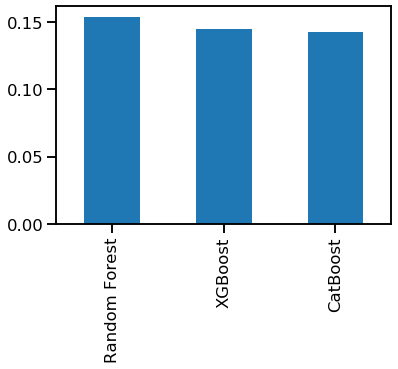

In [95]:
sns.set_context('talk')
fig = plt.figure(figsize=(8,12))
compare_res.plot(kind='bar' ,legend=False);

Eventually we have that the lowest RMSLE value if the one returned by the CatBoost Regressor, which now will be used to make final predictions on test dataset.

### Make predictions using the best model

We can finally make prediction on the test dataset using the XGBoost Regressor which got best RMSLE result. Before that we need to check whether train and test dataset have same number of columns.

In [97]:
# Before makinf any prediction, we have to make sure that Train and Test datasets have same dimensions
train_df.shape, test_df.shape

((1460, 127), (1459, 134))

In [99]:
# The test dataset has more columns; let's check which are those:
set(test_df.columns) - set(train_df.columns)

{'BsmtFinSF1_is_missing',
 'BsmtFinSF2_is_missing',
 'BsmtFullBath_is_missing',
 'BsmtHalfBath_is_missing',
 'BsmtUnfSF_is_missing',
 'GarageArea_is_missing',
 'GarageCars_is_missing',
 'TotalBsmtSF_is_missing'}

In [100]:
# Adding missing columns to train dataset with standard value False
l=['BsmtFinSF1_is_missing',
 'BsmtFinSF2_is_missing',
 'BsmtFullBath_is_missing',
 'BsmtHalfBath_is_missing',
 'BsmtUnfSF_is_missing',
 'GarageArea_is_missing',
 'GarageCars_is_missing',
 'TotalBsmtSF_is_missing']
for i in l:
    train_df[i] = False

In [101]:
train_df.shape

(1460, 135)

In [104]:
# Check again columns difference
set(train_df.columns) - set(test_df.columns)

{'SalePrice'}

Obviously train set has one more column which corresponds to the label we need to find with our predictions.

In [105]:
test_preds = cat_model.predict(df_test)
test_preds

array([123093.40271909, 153973.7255461 , 180620.60590097, ...,
       177924.8852277 , 118480.07592785, 231798.99375009])

Format the result with the same format Kaggle asked for ('for each Id in the test set, there must be the value of its SalePrice variable')

In [106]:
df_preds = pd.DataFrame()
df_preds['Id'] = test_df['Id']
df_preds['SalePrice'] = test_preds

df_preds.head()

,Id,SalePrice
0,1461,123093.402719
1,1462,153973.725546
2,1463,180620.605901
3,1464,183069.477514
4,1465,204728.461587


In [107]:
df_preds.to_csv('My_Projects_Data/3. House_prices_advanced_regression/df_preds_v2.csv', index=False)